In [21]:
import kagglehub

# Downloading the latest version
path = kagglehub.dataset_download("milobele/sentiment140-dataset-1600000-tweets")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/milobele/sentiment140-dataset-1600000-tweets/versions/1


In [22]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#warnings
import warnings
warnings.filterwarnings('ignore')
# Text preprocessing
import nltk

# Downloading the 'stopwords' dataset
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
#Importing Dataset
data = pd.read_csv('/root/.cache/kagglehub/datasets/milobele/sentiment140-dataset-1600000-tweets/versions/1/testdata.manual.2009.06.14.csv')

In [24]:
data

,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
...,...,...,...,...,...,...
492,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
493,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
494,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
495,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [25]:
data.head()

,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
3,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
4,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   4                                                                                                                497 non-null    int64 
 1   3                                                                                                                497 non-null    int64 
 2   Mon May 11 03:17:40 UTC 2009                                                                                     497 non-null    object
 3   kindle2                                                                                                          497 non-null    object
 4   tpryan                                       

In [27]:

data.columns = ['polarity', 'id', 'date', 'query', 'user', 'tweet']


In [28]:
# Selecting the relevant columns
data = data[['polarity', 'tweet']]

In [29]:
#Now Mapping polarity to categories

data['polarity'] = data['polarity'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

# Data cleaning

In [30]:

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Removing URLs
    text = re.sub(r'@\w+', '', text)    # Removing mentions
    text = re.sub(r'#', '', text)        # Removing hashtags symbol
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing special characters
    text = text.lower().strip()         # Converting to lowercase
    return text

data['cleaned_tweet'] = data['tweet'].apply(clean_text)


In [31]:


# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [32]:


# Downloading the 'wordnet' dataset
nltk.download('wordnet') # Download the wordnet dataset

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Downloading the 'punkt_tab' data package
nltk.download('punkt_tab')

def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['processed_tweet'] = data['cleaned_tweet'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


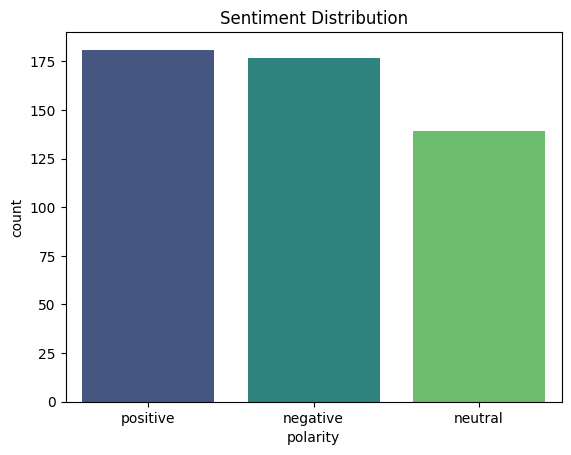

In [33]:
# Visualize=ing the sentiment distribution
sns.countplot(x='polarity', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

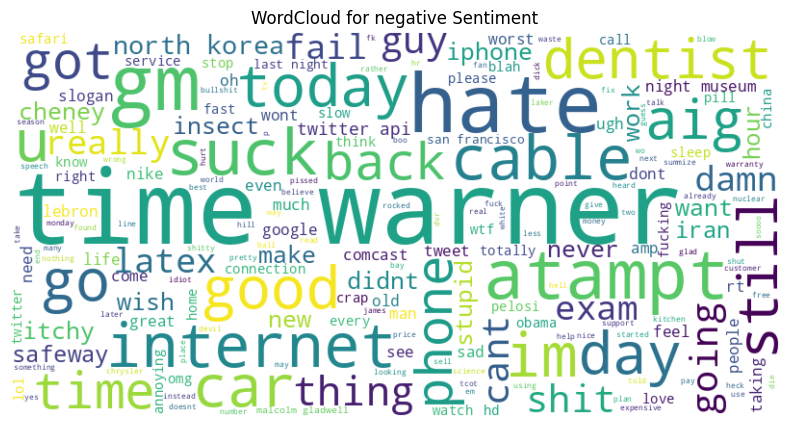

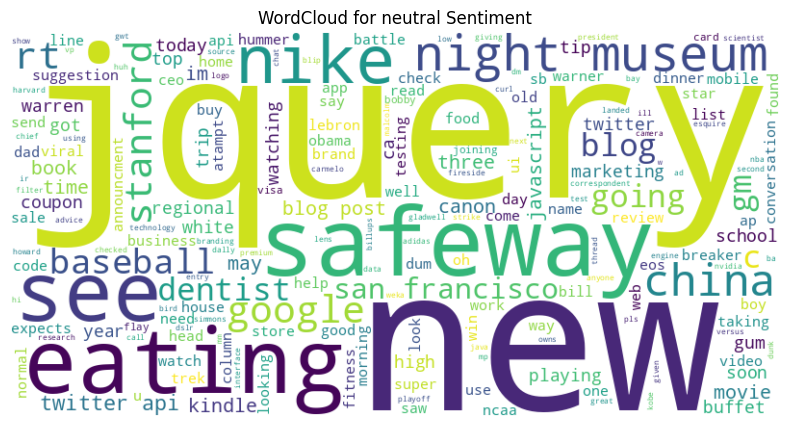

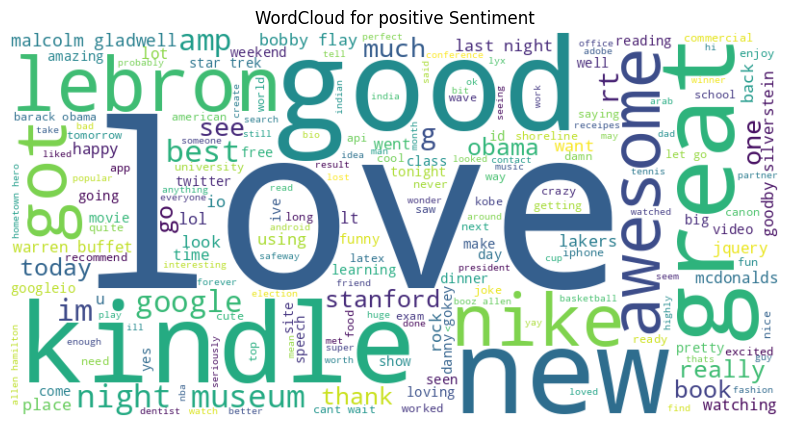

In [34]:
# Generating the WordCloud for each sentiment
for sentiment in ['negative', 'neutral', 'positive']:
    text = ' '.join(data[data['polarity'] == sentiment]['processed_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Sentiment')
    plt.show()

In [35]:
# Train test split
X = data['processed_tweet']
y = data['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [36]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [37]:
# Defining models and parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}


In [38]:
params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

In [39]:
# Performing GridSearchCV for each model
best_models = {}
for model_name in models:
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(models[model_name], params[model_name], cv=3, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train_tfidf, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 10}
Tuning SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}


In [41]:
# Evaluating each best model
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred) # Calculating accuracy as well
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Evaluating Logistic Regression...
Accuracy: 0.6533
Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.79      0.70        47
     neutral       0.56      0.46      0.51        39
    positive       0.73      0.67      0.70        64

    accuracy                           0.65       150
   macro avg       0.64      0.64      0.63       150
weighted avg       0.65      0.65      0.65       150


Evaluating SVM...
Accuracy: 0.6333
Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.77      0.68        47
     neutral       0.55      0.46      0.50        39
    positive       0.71      0.64      0.67        64

    accuracy                           0.63       150
   macro avg       0.62      0.62      0.62       150
weighted avg       0.63      0.63      0.63       150


Evaluating Random Forest...
Accuracy: 0.6667
Classification Report:
              precision    recall  

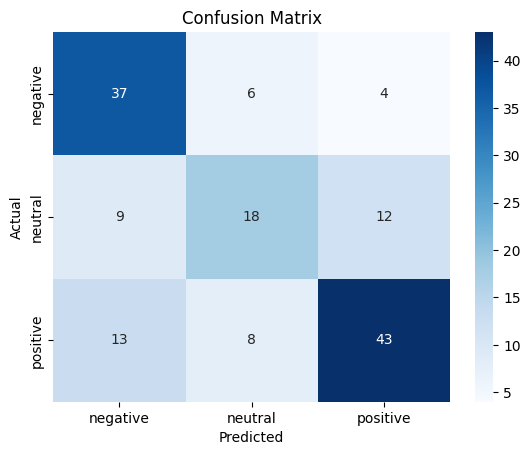

In [42]:
# Creating Confusion Matrix for the best model
best_model = best_models['Logistic Regression']  # As Logistic Regression as the best
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_tfidf))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [43]:
# Topic Modeling with LDA

vectorizer_lda = CountVectorizer(max_features=1000, stop_words='english')
X_lda = vectorizer_lda.fit_transform(data['processed_tweet'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_lda)

LatentDirichletAllocation(n_components=5, random_state=42)

In [44]:
# Displaying the topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}: ", [vectorizer_lda.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:  ['got', 'internet', 'cable', 'gm', 'love', 'lebron', 'rt', 'nike', 'warner', 'time']
Topic 2:  ['silverstein', 'goodby', 'day', 'nike', 'gm', 'car', 'im', 'great', 'good', 'new']
Topic 3:  ['like', 'good', 'stanford', 'dentist', 'atampt', 'today', 'francisco', 'san', 'come', 'hate']
Topic 4:  ['eating', 'movie', 'book', 'got', 'safeway', 'jquery', 'new', 'love', 'museum', 'night']
Topic 5:  ['new', 'video', 'look', 'kindle', 'time', 'read', 'using', 'good', 'api', 'twitter']


In [46]:
# Clustering with K Means
kmeans = KMeans(n_clusters= 10, random_state=100)
kmeans_labels = kmeans.fit_predict(X_train_tfidf)

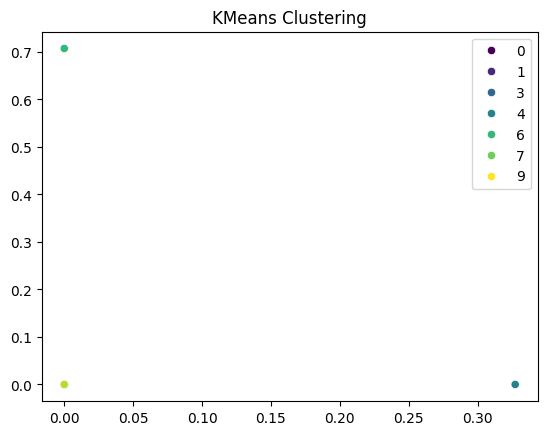

In [47]:
# Visualizing clustering results
sns.scatterplot(x=X_train_tfidf.toarray()[:, 0], y=X_train_tfidf.toarray()[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering')
plt.show()


In [48]:
from sklearn.cluster import KMeans

# Assuming X_train_tfidf is our TF-IDF matrix
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=100)
cluster_labels = kmeans.fit_predict(X_train_tfidf)

# Creating a new DataFrame for the training data with cluster labels
clustered_data = pd.DataFrame({'processed_tweet': X_train, 'cluster_kmeans': cluster_labels})

data = pd.merge(data, clustered_data[['processed_tweet', 'cluster_kmeans']], on='processed_tweet', how='left', suffixes=('', '_y'))

# Exploring the clusters
for i in range(num_clusters):
    print(f"Cluster {i}:")
    # Accessing cluster column
    cluster_tweets = data[data['cluster_kmeans'] == i]['processed_tweet']
    print(cluster_tweets.sample(10))  # Printing 10 sample tweets from the cluster

Cluster 0:
377       old cocacola guy gm board stupid heck tcot ala
376    never buy government motor vehicle recently dr...
372    shame gm forced make car white house think sel...
158                    gm ceo china continue key partner
220    youre harassed call car warranty changing numb...
89     burning cash chrysler gm stop financial tsunam...
380    hear gm thing angry get billion wasted bullshi...
138        tell giving gm use program support unemployed
131      night museum wolverine junk food perfect monday
159                                   rt time buy gm car
Name: processed_tweet, dtype: object
Cluster 1:
256    lebron done nba probably greater kobe like u s...
252        lebron cool like personalityhe good character
122    viral marketing fail acia pill brand oughta ge...
402                         gm file bankruptcy good sign
288                         star trek good everyone said
340                         exam went good prayer worked
253            watching lebro

Our evaluation showed that Logistic Regression outperformed SVM and Random Forest in terms of balanced F1-score across sentiment classes. Clustering and topic modeling provided valuable insights into sentiment distribution and key themes. While the analysis effectively demonstrated sentiment analysis techniques, further improvements could be achieved through fine-tuning and dimensionality reduction to enhance cluster visualization.